# ASSIGNMENT NO.4 ( SIMPLE LINEAR REGRESSION )

## <FONT COLOR = RED>  Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data= pd.read_csv("delivery_time (1).csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

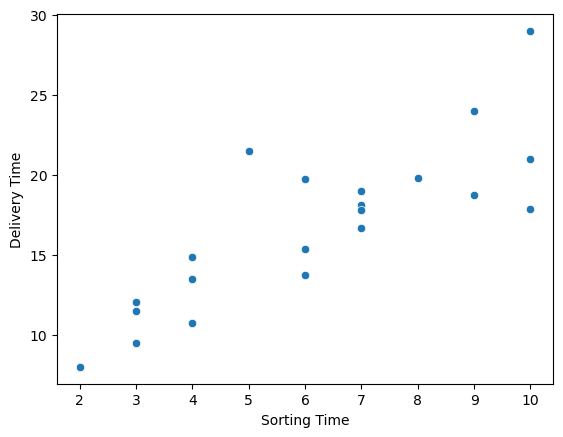

In [5]:
sns.scatterplot(x=data["Sorting Time"], y=data["Delivery Time"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

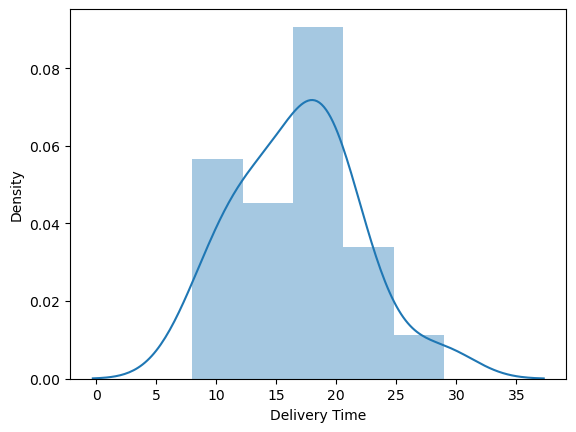

In [6]:
sns.distplot(data['Delivery Time'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

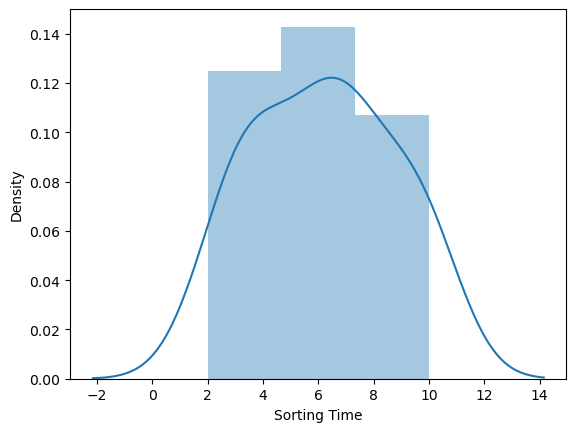

In [7]:
sns.distplot(data['Sorting Time'])

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
x=np.array(data["Sorting Time"])
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  1
Shape :  (21,)


In [10]:
x=x.reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (21, 1)


In [11]:
y=np.array(data["Delivery Time"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (21, 1)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
print("Length of X_train : ", len(x_train))
print("Length of Y_train : ", len(y_train))
print("Length of X_test : ", len(x_test))
print("Length of Y_test : ", len(y_test))

Length of X_train :  16
Length of Y_train :  16
Length of X_test :  5
Length of Y_test :  5


In [14]:
x_test

array([[10],
       [ 3],
       [ 7],
       [ 7],
       [ 3]], dtype=int64)

In [15]:
y_test

array([[21.  ],
       [ 9.5 ],
       [18.11],
       [16.68],
       [11.5 ]])

In [16]:
y_test

array([[21.  ],
       [ 9.5 ],
       [18.11],
       [16.68],
       [11.5 ]])

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
model.score(x_test,y_test)

0.832510455909098

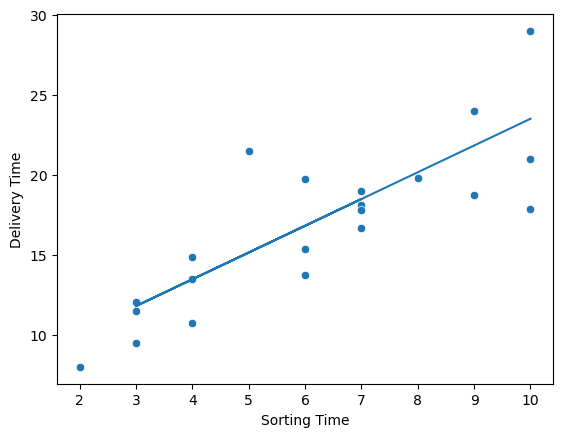

In [19]:
sns.scatterplot(x=data["Sorting Time"],y=data["Delivery Time"])
plt.plot(x_test,model.predict(x_test))
plt.show()

In [20]:
model.coef_

array([[1.67241935]])

In [21]:
model.intercept_

array([6.78612903])

In [22]:
y_predicted = model.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[23.51],
       [11.8 ],
       [18.49],
       [18.49],
       [11.8 ]])

In [23]:
x_test[0:,0]

array([10,  3,  7,  7,  3], dtype=int64)

In [24]:
y_test[0:,0]

array([21.  ,  9.5 , 18.11, 16.68, 11.5 ])

In [25]:
data_1 = {"Test_Sorting_Time" : x_test[0:,0], "Actual_Delivery_Time" : y_test[0:,0], "Predicted_Delivery_Time" : y_predicted[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("delivery_time.csv")
data_1.head()

,Test_Sorting_Time,Actual_Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.51
1,3,9.50,11.80
2,7,18.11,18.49
3,7,16.68,18.49
4,3,11.50,11.80


In [26]:
import statsmodels.formula.api as smf

In [27]:
linear_model = smf.ols("y~x", data=data).fit()

In [28]:
linear_model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [29]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        15:48:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (A) No transformation

In [30]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [31]:
import statsmodels.api as sm

In [32]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    6.12e-15
Time:                        15:48:24   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (B) Log Transformation of X

In [34]:
x_log = np.log(data['Sorting Time'])

In [35]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    1.48e-17
Time:                        15:48:24   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (C) Log Transformation of Y

In [37]:
y_log = np.log(data['Delivery Time'])

In [38]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    3.00e-12
Time:                        15:48:24   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (D) Log Transformation of X & Y

In [40]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    5.72e-17
Time:                        15:48:24   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (E) Sq Root Transformation of X


In [42]:
x_sqrt = np.sqrt(data['Sorting Time'])

In [43]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    1.88e-17
Time:                        15:48:24   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (F) Square Root Transformation of Y

In [45]:
y_sqrt = np.sqrt(data['Delivery Time'])

In [46]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    5.09e-13
Time:                        15:48:24   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (G) Square Root Transformation of X & Y

In [48]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    2.10e-20
Time:                        15:48:24   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  ===============================================================

## <font color = red > Build a prediction model for Salary hike

In [50]:
data2 = pd.read_csv("Salary_Data (1).csv")


In [51]:
data2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

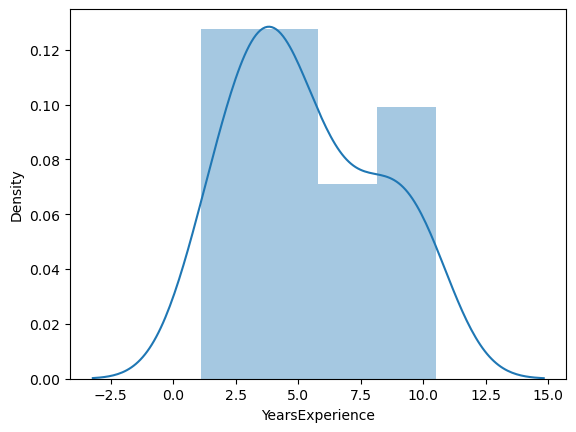

In [53]:
sns.distplot(data2['YearsExperience'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

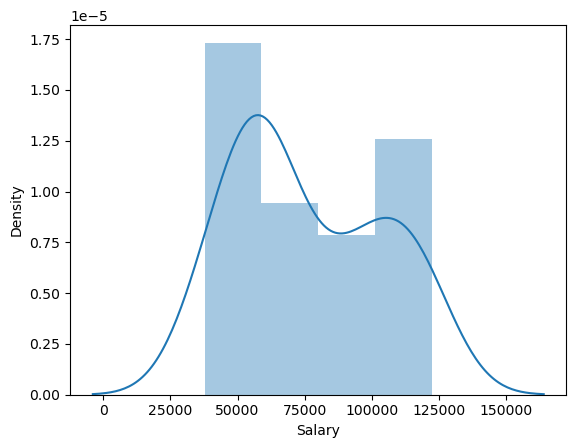

In [54]:
sns.distplot(data2['Salary'])

In [55]:
x = data2['YearsExperience']
y = data2['Salary']

In [56]:
from numpy.polynomial.polynomial import polyfit

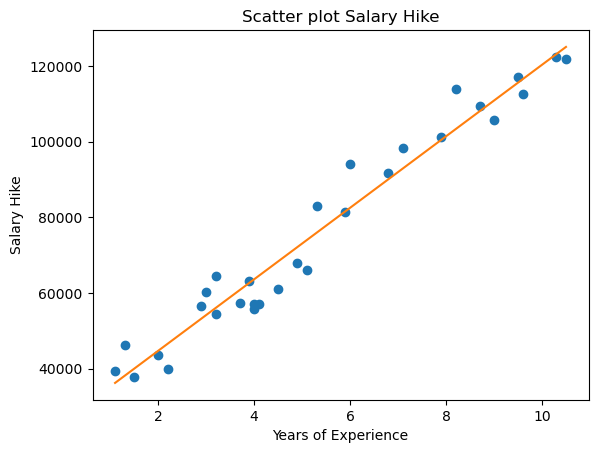

In [57]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

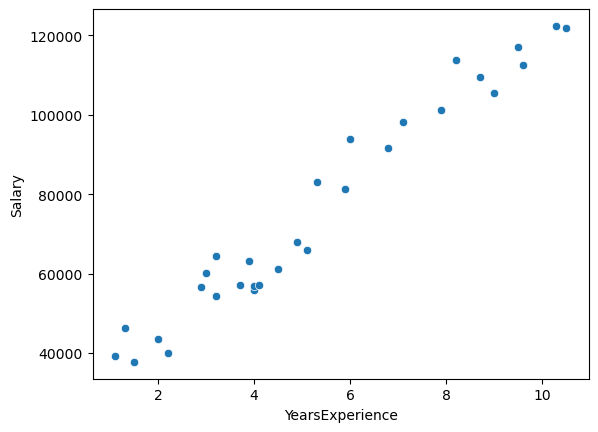

In [58]:
sns.scatterplot(x=data2.YearsExperience, y=data2.Salary)

### Correlation Analysis

In [59]:
data2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Regression Model

In [60]:
x = np.array(data2["YearsExperience"]).reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [61]:
y = np.array(data2["Salary"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
print("Length of X_Train : ",len(x_train))
print("Length of Y_Train : ",len(y_train))
print("Length of X_Test : ",len(x_test))
print("Length of Y_Test : ",len(y_test))

Length of X_Train :  24
Length of Y_Train :  24
Length of X_Test :  6
Length of Y_Test :  6


In [64]:
x_test

array([[9.6],
       [2. ],
       [4.9],
       [8.7],
       [5.9],
       [3.2]])

In [65]:
y_test

array([[112635.],
       [ 43525.],
       [ 67938.],
       [109431.],
       [ 81363.],
       [ 54445.]])

In [66]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
model.score(x_test,y_test)

0.9883615540017123

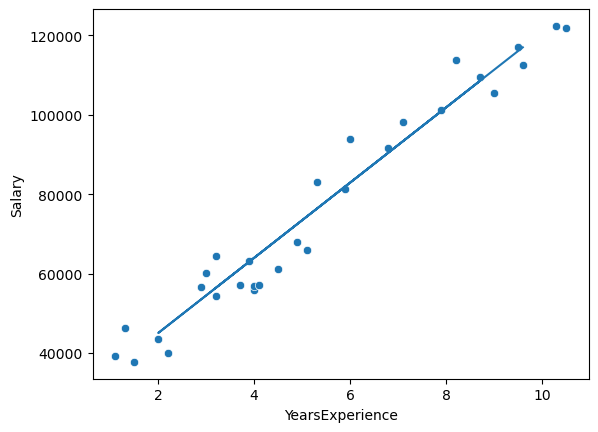

In [68]:
sns.scatterplot(x=data2.YearsExperience, y=data2.Salary)
plt.plot(x_test,model.predict(x_test))
plt.show()

In [69]:
model.coef_

array([[9470.90236992]])

In [70]:
model.intercept_

array([26080.96306345])

In [71]:
y_predict = np.round(model.predict(x_test),2)
y_predict[0:,0]

array([117001.63,  45022.77,  72488.38, 108477.81,  81959.29,  56387.85])

In [72]:
x_test[0:,0]

array([9.6, 2. , 4.9, 8.7, 5.9, 3.2])

In [73]:
y_test[0:,0]

array([112635.,  43525.,  67938., 109431.,  81363.,  54445.])

In [74]:
data_3 = {"Test_YearsExperience" : x_test[0:,0], "Actual_Salary" : y_test[0:,0], "Predicted_Salary" : y_predict[0:,0]}
data_3 = pd.DataFrame(data_3)
data_3.to_csv("Salary_Data.csv") 
data_3.head()

,Test_YearsExperience,Actual_Salary,Predicted_Salary
0,9.6,112635.0,117001.63
1,2.0,43525.0,45022.77
2,4.9,67938.0,72488.38
3,8.7,109431.0,108477.81
4,5.9,81363.0,81959.29


In [75]:
import statsmodels.formula.api as smf

In [76]:
linear_model = smf.ols("y~x", data=data2).fit()

In [77]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [78]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        15:48:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1. No transformation

In [79]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    2.56e-24
Time:                        15:48:27   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2 - Log Transformation of X

In [81]:
x_log = np.log(data2['YearsExperience'])

In [82]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    8.06e-26
Time:                        15:48:27   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3 - Log Transformation of Y

In [84]:
y_log = np.log(data2['Salary'])

In [85]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    6.09e-12
Time:                        15:48:27   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 - Log Transformation of X & Y

In [87]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    8.60e-15
Time:                        15:48:27   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 - Sq Root Transformation of X

In [89]:
x_sqrt = np.sqrt(data2['YearsExperience'])

In [90]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    3.62e-30
Time:                        15:48:27   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6 - Square Root Transformation of Y

In [92]:
y_sqrt = np.sqrt(data2['Salary'])

In [93]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    2.12e-16
Time:                        15:48:27   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7 - Square Root Transformation of X & Y

In [95]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                    2.81e-29
Time:                        15:48:27   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""